In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')




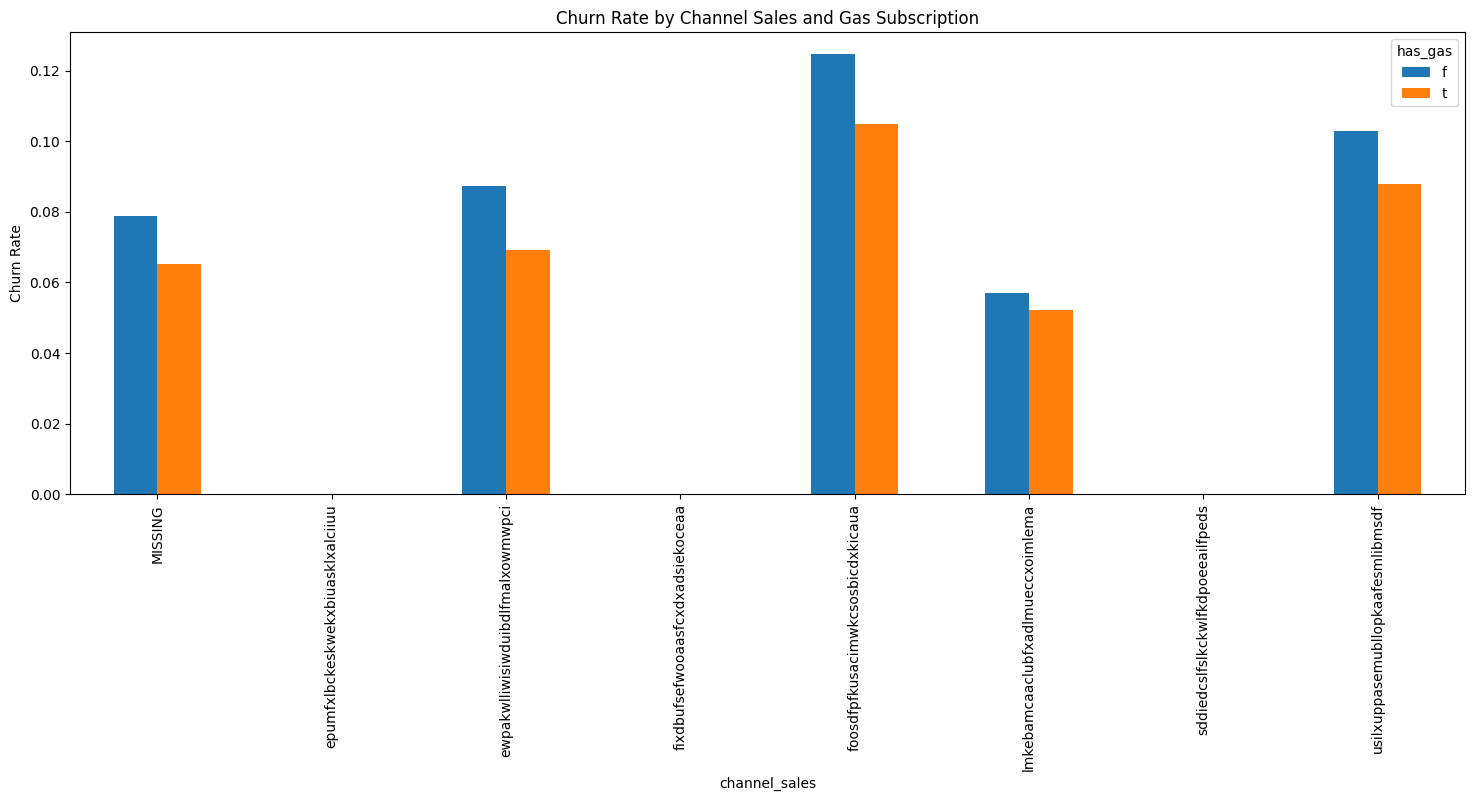

In [6]:
# Visualize churn rates by channel_sales and has_gas
channel_gas_churn = client_df.groupby(['channel_sales', 'has_gas'])['churn'].mean().unstack()
channel_gas_churn.plot(kind='bar', figsize=(18, 6))
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Channel Sales and Gas Subscription')
plt.show()



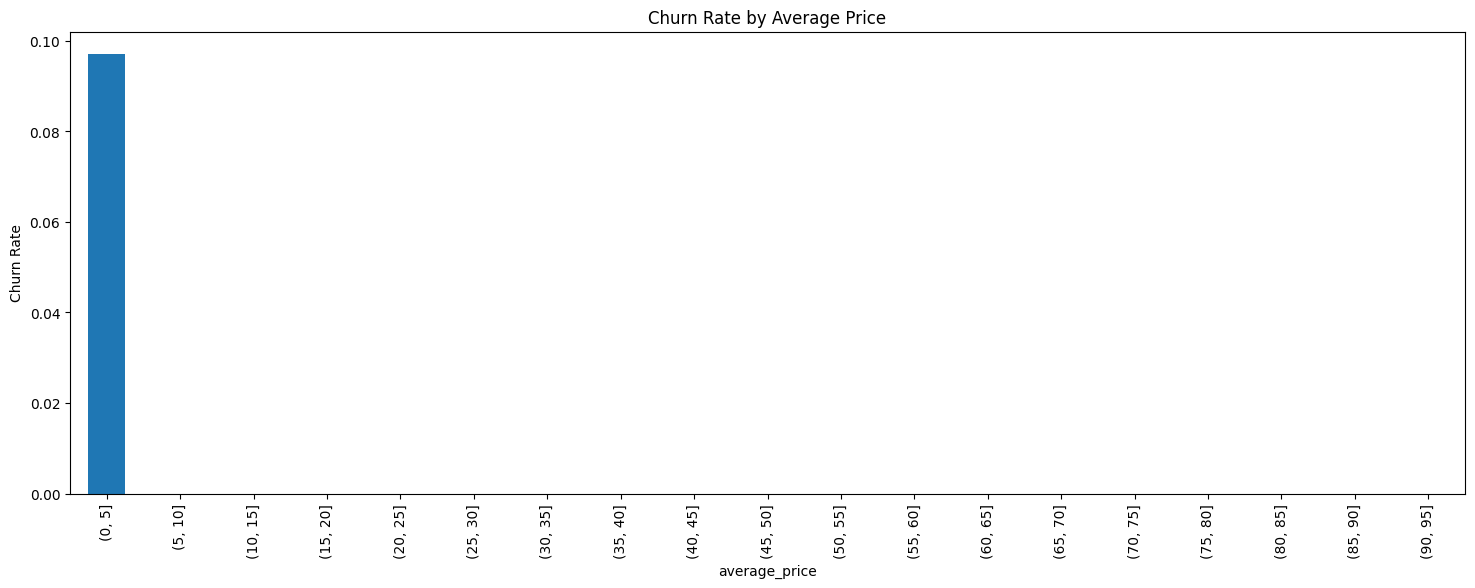

Correlation between price sensitivity and churn: nan


In [7]:
# Merge client and price data
merged_df = pd.merge(client_df, price_df, on='id')

# Calculate average price
merged_df['average_price'] = (merged_df['price_off_peak_var'] + merged_df['price_peak_var'] + merged_df['price_mid_peak_var']) / 3

# Visualize churn rate by average price
price_churn = merged_df.groupby(pd.cut(merged_df['average_price'], bins=range(0, 100, 5)))['churn'].mean()
price_churn.plot(kind='bar', figsize=(18, 6))
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Average Price')
plt.show()

# Calculate price sensitivity as the percentage change in average price over time
merged_df['price_sensitivity'] = merged_df.groupby('id')['average_price'].pct_change()
merged_df = merged_df.dropna(subset=['price_sensitivity'])

# Calculate correlation between price_sensitivity and churn
correlation = merged_df['price_sensitivity'].corr(merged_df['churn'])
print(f"Correlation between price sensitivity and churn: {correlation:.2f}")